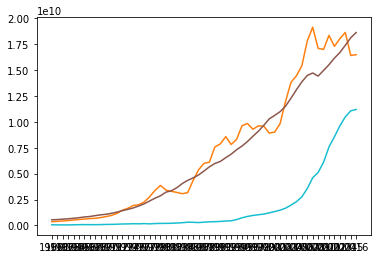

In [36]:
import matplotlib.pyplot as plt


def plot_data(list_countries, csv_file='gdp.csv'):
    """
    Simple function that plots from a given csv file of gdp data
    including country name and year.
    
    Parameters:
    (String)csv_file : name of file to be parsed and plotted.
    (list)list_countries : list of countries whose data will be plotted.
    """
    values = list()
    year = list()
    try:
        fopen = open(csv_file)        
    except FileNotFoundError:
        print('ERROR: csv file not found! Cannot plot any data.')
        return None
    
    #ignore header file
    fopen.readline()
    
    for line in fopen:
        line = line.strip('\n')
        data = line.split(',')
        
        #Some data has an extra comma for 'The'.
        #In case this happens data must be parsed differently.
        if data[1] == ' The"':
            #Removing unnecessary quotes and spacing on country name
            data[1] = data[1].replace('"', '')
            data[0] = data[0].replace('"', '')
            data[1] = data[1].replace(' ', '')
            
            if data[1] + ' ' + data[0] in list_countries:
                #append year and gdp value
                year.append(data[3])
                values.append(data[4])
                continue
        else:
            if data[0] in list_countries:
                year.append(data[2])
                values.append(float(data[3]) / 1000)
                continue
        plt.plot(year, values)
        values = list()
        year = list()
        
    plt.plot(year, values)
    plt.show()
    fopen.close()
        
list_countries = ['United States', 'China', 'European Union']
plot_data(list_countries)
